IMPORT LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

LOADING DATA

In [4]:
# CREATING PATH
path= r"C:\Users\henry\OneDrive\Achievement 6\Data\flavors_of_cacao_cleaned.csv"
# IMPORTING DATA
df=pd.read_csv(path)


In [5]:
df.head


<bound method NDFrame.head of      Company  (Maker-if known)             BarName   REF  ReviewDate  \
0                     A. Morin         Agua Grande  1876        2016   
1                     A. Morin               Kpime  1676        2015   
2                     A. Morin              Atsane  1676        2015   
3                     A. Morin               Akata  1680        2015   
4                     A. Morin              Quilla  1704        2015   
...                        ...                 ...   ...         ...   
1790                    Zotter                Peru   647        2011   
1791                    Zotter               Congo   749        2011   
1792                    Zotter        Kerala State   749        2011   
1793                    Zotter        Kerala State   781        2011   
1794                    Zotter  Brazil, Mitzi Blue   486        2010   

      CocoaPercent Location  Rating   BeanType BroadOrigin  
0             63.0   France    3.75         

In [6]:
# Drop columns not used in EDA
for col in ['REF', 'BarName']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

In [7]:
# Confirm final shape and columns
df.shape, df.columns.tolist()

((1795, 7),
 ['Company\xa0 (Maker-if known)',
  'ReviewDate',
  'CocoaPercent',
  'Location',
  'Rating',
  'BeanType',
  'BroadOrigin'])

In [8]:
# 1. Normalize all column names: replace any \xa0 with a normal space, then strip leading/trailing whitespace
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]

# 2. Now rename the cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin']

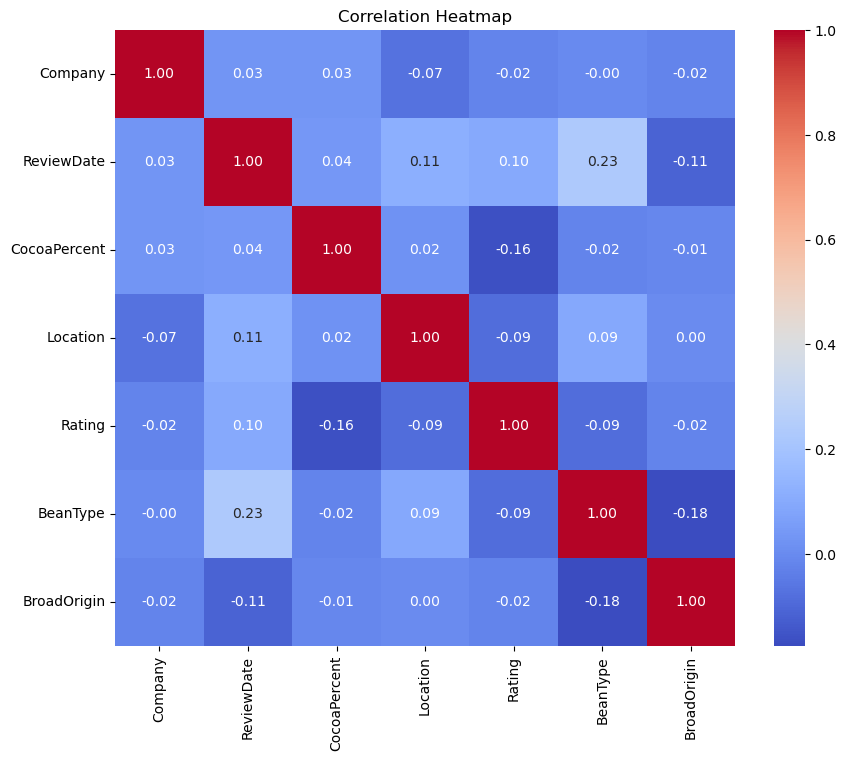

In [9]:
# Encode categoricals
encoded = df.copy()
for col in ['Company','Location','BeanType','BroadOrigin']:
    encoded[col] = encoded[col].astype('category').cat.codes
# Plot heatmap
plt.figure(figsize=(10,8))
corr = encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Heatmap Interpretation 
- Slight negative correlation between 'CocoaPercent' and 'Rating'.
- Other variables show very weak correlations, indicating minimal linear dependencies.

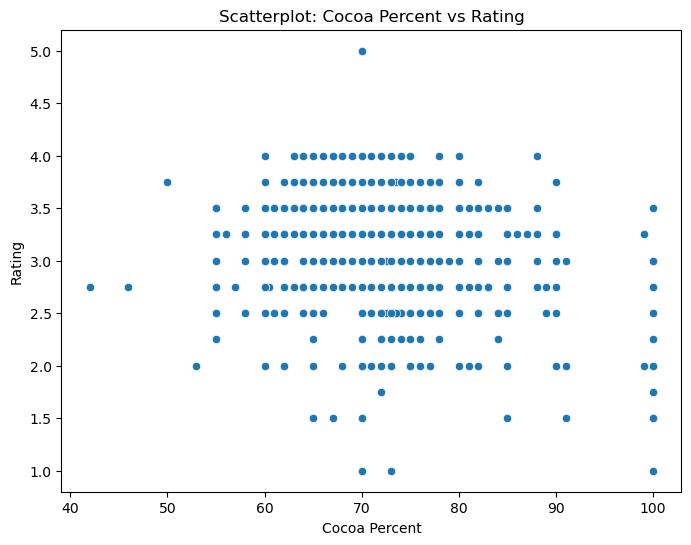

In [11]:
#  Scatterplot: CocoaPercent vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CocoaPercent', y='Rating')
plt.title('Scatterplot: Cocoa Percent vs Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

#  Scatter Plot Interpretation
As cocoa percent increases, ratings tend to decline slightly.

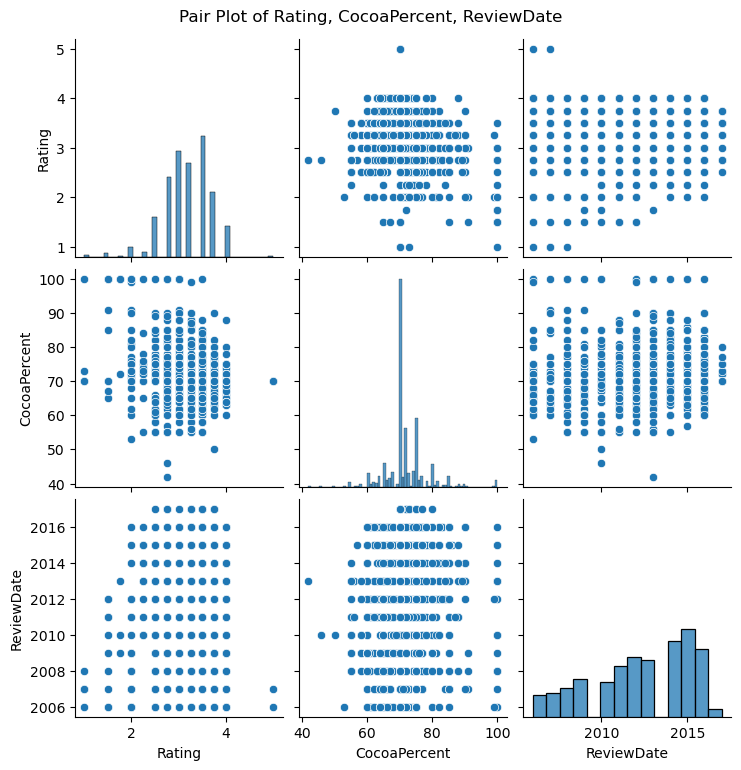

In [13]:
# Pair Plot: Rating, CocoaPercent, ReviewDate
sns.pairplot(df[['Rating', 'CocoaPercent', 'ReviewDate']])
plt.suptitle('Pair Plot of Rating, CocoaPercent, ReviewDate', y=1.02)
plt.show()

# Pair Plot Interpretation:
Reinforces negative trend between Rating and CocoaPercent.
No clear time-based trend in ReviewDate.

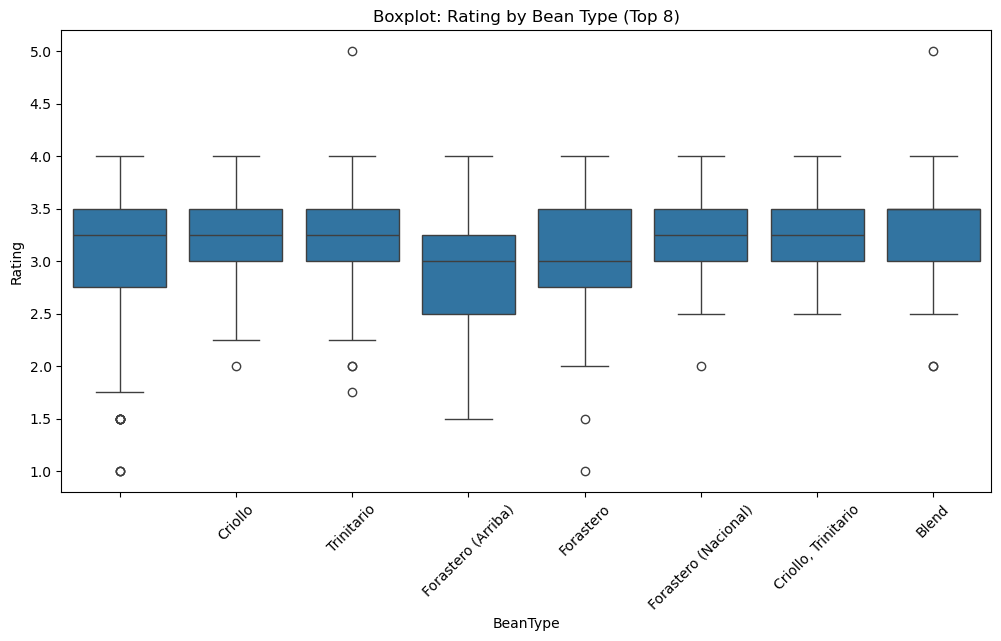

In [15]:
# Categorical Plot: Rating by BeanType (top 8)
plt.figure(figsize=(12, 6))
top_beans = df['BeanType'].value_counts().nlargest(8).index
sns.boxplot(data=df[df['BeanType'].isin(top_beans)],
            x='BeanType', y='Rating')
plt.xticks(rotation=45)
plt.title('Boxplot: Rating by Bean Type (Top 8)')
plt.show()

# Categorical Plot Interpretation:
 - Trinitario & Criollo have higher median ratings.
 - Forastero & Unknown show wider rating variability.

Question 1 How does CocoaPercent correlate with Rating?
Answer: Slight negative correlation between 'CocoaPercent' and 'Rating'.
More Questions
1. Which bean types receive the highest ratings?
2. Are there any temporal trends in ratings over review years?


In [18]:
Hypothesis
1. Higher cocoa content results in lower flavor ratings.  
2. Chocolates made from Trinitario or Criollo beans are rated more favorably.  
3. Bean type influences rating more strongly than company location or review year.

SyntaxError: invalid syntax (4055626507.py, line 2)